In [49]:
%matplotlib inline

In [66]:
# coding: utf-8


import os
import numpy as np
import pickle as pkl
import argparse
from helpers import load_cascades
from graph_helpers import load_graph_by_name
from tqdm import tqdm
from joblib import Parallel, delayed
from sklearn.metrics import roc_auc_score, average_precision_score


parser = argparse.ArgumentParser(description='')
parser.add_argument('-g', '--graph', help='graph name')

# args = parser.parse_args()

# graph_name = args.graph
graph_name = 'karate'

inf_proba_dirname = 'outputs/inf_probas/{}'.format(graph_name)


g = load_graph_by_name(graph_name)

cascades = load_cascades('cascade/' + graph_name)


methods = ['pagerank', 'random', 'entropy', 'prediction_error']




In [67]:
cascades = load_cascades('cascade/' + graph_name)

scores_by_method = {}
for method in methods:
    scores_by_method[method] = []
    
for c_path, (obs, c) in tqdm(cascades):
    infected = (c >= 0).nonzero()[0]    
    y_true = np.zeros((len(c), ))
    y_true[infected] = 1
    
    for method in methods:

        cid = os.path.basename(c_path).split('.')[0]
        inf_probas_path = os.path.join(
            inf_proba_dirname,
            method,
            '{}.pkl'.format(cid))
        inf_probas_list = pkl.load(open(inf_probas_path, 'rb'))

        scores = []
        for inf_probas in inf_probas_list:                    
            # auc = roc_auc_score(y_true, inf_probas, average=None)
            score = average_precision_score(y_true, inf_probas)
            scores.append(score)
#            y_pred = (inf_probas > 0.5).nonzero()[0]
#            y_pred
        scores_by_method[method].append(scores)

100it [00:02, 41.12it/s]


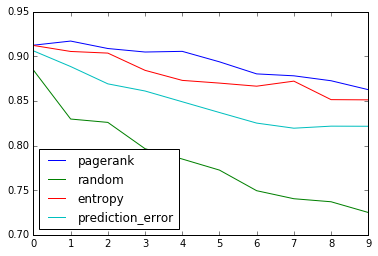

In [68]:
from matplotlib import pyplot as plt

plt.clf()
for method in methods:
    scores = np.array(scores_by_method[method], dtype=np.float32)
    mean_scores = np.median(scores, axis=0)
    plt.plot(mean_scores)
    plt.hold(True)
plt.legend(methods, loc='lower left')    